In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier as DTC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder as LE

In [2]:
DF  = pd.read_csv('titanic.csv')

In [3]:
DF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


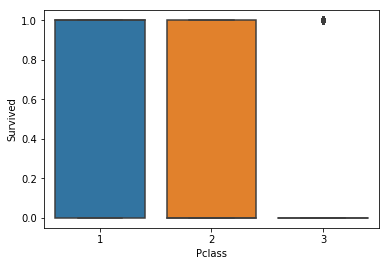

In [4]:
# plt.plot(DF['Pclass'],DF['Survived'],'b.')
sns.boxplot(DF['Pclass'],DF['Survived'])
# plt.xlabel('Pclass')
# plt.ylabel('Survived')

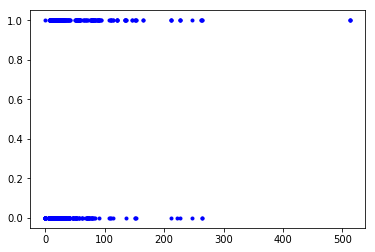

In [5]:
plt.plot(DF['Fare'],DF['Survived'],'b.')

In [6]:
le_sex = LE()
DF['Sex_n'] = le_sex.fit_transform(DF['Sex'])
DF['Age'] = DF.Age.fillna(DF.Age.median())

In [7]:
DF.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Sex'],axis='columns',inplace=True)

In [8]:
inputs = DF[['Pclass','Age','Fare','Sex_n']]
target = DF['Survived']

In [9]:
model = DTC()
X_train, X_test, y_train, y_test = tts(inputs,target,test_size=0.1)

In [10]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
model.score(X_test,y_test)

0.8